<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/%EA%B8%B0%ED%9B%84%EC%98%A8%EB%82%9C%ED%99%94%EC%97%90_%EB%94%B0%EB%A5%B8_%EC%A0%9C%EC%A3%BC%EC%A7%80%EC%A0%90_%EC%98%81%ED%96%A5%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 파일 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,940 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

In [ ]:
#라이브러리 설치 :  EXCEL 파일 읽기 위해 필요
!pip install openpyxl

# 1. "기상청 기상자료개방포털" 사이트의 "날씨 이슈별 데이터" 중 "폭염" 데이터를 2019년 5월부터 2024년 9월까지 총 30개의 엑셀파일을 하나의 데이터프레임으로 합쳐서, "제주지점"의 데이터만 추출하여 "df_jeju_final"이름의 데이터프레임을 만듦

In [ ]:
import pandas as pd

file_paths = [
    './HW_2019-05.xlsx', './HW_2019-06.xlsx', './HW_2019-07.xlsx',
    './HW_2019-08.xlsx', './HW_2019-09.xlsx', './HW_2020-05.xlsx',
    './HW_2020-06.xlsx', './HW_2020-07.xlsx', './HW_2020-08.xlsx',
    './HW_2020-09.xlsx', './HW_2021-05.xlsx', './HW_2021-06.xlsx',
    './HW_2021-07.xlsx', './HW_2021-08.xlsx', './HW_2021-09.xlsx',
    './HW_2022-05.xlsx', './HW_2022-06.xlsx', './HW_2022-07.xlsx',
    './HW_2022-08.xlsx', './HW_2022-09.xlsx', './HW_2023-05.xlsx',
    './HW_2023-06.xlsx', './HW_2023-07.xlsx', './HW_2023-08.xlsx',
    './HW_2023-09.xlsx', './HW_2024-05.xlsx', './HW_2024-06.xlsx',
    './HW_2024-07.xlsx', './HW_2024-08.xlsx', './HW_2024-09.xlsx'
]

df_jeju_final = pd.DataFrame()

for file_path in file_paths:
    # 각 파일 불러오기
    df = pd.read_excel(file_path)

    # 파일 이름에서 연도와 월 추출
    year_month = file_path.split('_')[1].split('.')[0]  # 예: "2019-05"
    year, month = year_month.split('-')

    # 제주(184) 데이터 필터링 후 특정 변수에 할당
    df_jeju_month = df[df['지점'] == '제주(184)']
    globals()[f"df_jeju_{year}_{month}"] = df_jeju_month  # 예: df_jeju_2019_05

    # 각 연도의 데이터 집계 및 해당 변수에 저장
    if f"df_jeju_{year}" not in globals():
        globals()[f"df_jeju_{year}"] = pd.DataFrame()
    globals()[f"df_jeju_{year}"] = pd.concat([globals()[f"df_jeju_{year}"], df_jeju_month], ignore_index=True)

    # 최종 DataFrame에 추가
    df_jeju_final = pd.concat([df_jeju_final, df_jeju_month], ignore_index=True)

# 합쳐진 데이터 출력
df_jeju_final.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2019-05-01,제주(184),X,20.0,18.6,14.7,12.4,74.6,X,,X,높음
1,2019-05-02,제주(184),X,21.7,21.5,17.2,12.8,40.9,X,,X,매우높음
2,2019-05-03,제주(184),X,22.3,21.9,18.9,16.0,49.0,X,,X,매우높음
3,2019-05-04,제주(184),X,22.1,23.3,19.2,14.7,48.0,X,,X,매우높음
4,2019-05-05,제주(184),X,22.2,22.2,19.0,16.4,51.9,X,,X,높음


# 2. "df_jeju_final" 데이터 프레임의 컬럼명을 바꾸고, 일자의 시간부분을 제거함.:

In [ ]:
# 첫 행의 컬럼명을 지정된 대로 변경하고, '일자' 열의 시간 부분을 제거한 후 다시 저장합니다.
df_jeju_final.columns = ["일자", "지점", "폭염", "최고체감온도", "최고기온", "평균기온",
                        "최저기온", "평균상대습도", "폭염특보", "폭염영향예보(단계)", "열대야",
                        "자외선지수"]

# '일자' 열에서 시간 부분 제거 (날짜까지만 표시)
df_jeju_final['일자'] = pd.to_datetime(df_jeju_final['일자']).dt.date

# 지정된 컬럼에서 'X'는 0으로, 'O'는 1로 변경
columns_to_replace = ['폭염', '폭염특보', '열대야']
df_jeju_final[columns_to_replace] = df_jeju_final[columns_to_replace].replace({'X': 0, 'O': 1})

df_jeju_final.head()

,일자,지점,폭염,최고체감온도,최고기온,평균기온,최저기온,평균상대습도,폭염특보,폭염영향예보(단계),열대야,자외선지수
0,2019-05-01,제주(184),0,20.0,18.6,14.7,12.4,74.6,0,,0,높음
1,2019-05-02,제주(184),0,21.7,21.5,17.2,12.8,40.9,0,,0,매우높음
2,2019-05-03,제주(184),0,22.3,21.9,18.9,16.0,49.0,0,,0,매우높음
3,2019-05-04,제주(184),0,22.1,23.3,19.2,14.7,48.0,0,,0,매우높음
4,2019-05-05,제주(184),0,22.2,22.2,19.0,16.4,51.9,0,,0,높음


# 3. 데이터프레임 "df_jeju_final"을 엑셀 파일로 저장함.

In [ ]:
# 엑셀 파일로 저장
output_file_path = './df_jeju_final.xlsx'
df_jeju_final.to_excel(output_file_path, index=False)

# 4. 그래프에 한글 사용이 가능하도록 폰트를 설정하고, 저장했던 "df_jeju_final.xlsx" 파일을 불러와 데이터프레임을 확인함.

In [ ]:
import matplotlib.pyplot as plt

# matplotlib에서 한글을 사용할 수 있도록 설정
plt.rc('font', family='NanumGothic')

# 엑셀 파일을 읽고 데이터프레임 생성
file_path = './df_jeju_final.xlsx'  # 업로드한 파일의 경로
df = pd.read_excel(file_path)

# 데이터프레임 확인
df.head()

,일자,지점,폭염,최고체감온도,최고기온,평균기온,최저기온,평균상대습도,폭염특보,폭염영향예보(단계),열대야,자외선지수
0,2019-05-01,제주(184),0,20.0,18.6,14.7,12.4,74.6,0,,0,높음
1,2019-05-02,제주(184),0,21.7,21.5,17.2,12.8,40.9,0,,0,매우높음
2,2019-05-03,제주(184),0,22.3,21.9,18.9,16.0,49.0,0,,0,매우높음
3,2019-05-04,제주(184),0,22.1,23.3,19.2,14.7,48.0,0,,0,매우높음
4,2019-05-05,제주(184),0,22.2,22.2,19.0,16.4,51.9,0,,0,높음


# 5. 각 년도의 월에 열대야가 몇 일간 발생했는지의 데이터를 .groupby 메써드로 구하고, 년도별 총 열대야 일수를 구하여 "df_jeju_tropical_night.xlsx" 이름의 엑셀 파일로 저장함.

In [ ]:
# '일자' 열을 이용해 연도와 월을 추출한 후, '열대야' 일수를 연도별로 월별 합계를 구하고,
# 각 연도별 총합계를 추가로 계산합니다.

# '일자' 열에서 연도와 월을 추출
df['연도'] = pd.to_datetime(df['일자']).dt.year
df['월'] = pd.to_datetime(df['일자']).dt.month

# '열대야' 열에서 월별 열대야 일수를 구하기 위해 그룹화
monthly_counts = df.groupby(['연도', '월'])['열대야'].sum().reset_index()

# 5월에서 9월까지 필터링 (원하는 월 범위)
monthly_counts = monthly_counts[monthly_counts['월'].isin([5, 6, 7, 8, 9])]

# 연도별 열대야 총합계 계산
yearly_sums = monthly_counts.groupby('연도')['열대야'].sum().reset_index()
yearly_sums['월'] = '합계'  # 합계 표시용

# 원래 데이터프레임에 연도별 합계 추가
final_data = pd.concat([monthly_counts, yearly_sums], ignore_index=True)

final_data.head()

# 엑셀 파일로 저장
output_file_path = './df_jeju_tropical_night.xlsx'
final_data.to_excel(output_file_path, index=False)

# 6. 매년 7, 8, 9월과 년합계 열대야 일수 막대그래프의 색상을 다르게 정하여 년도별로 직관적인 비교가 가능하도록 하면서 년합계 열대야 일수는 추가로 꺾은선 그래프로 그려서 그 추세를 알기 쉽게 표현함.

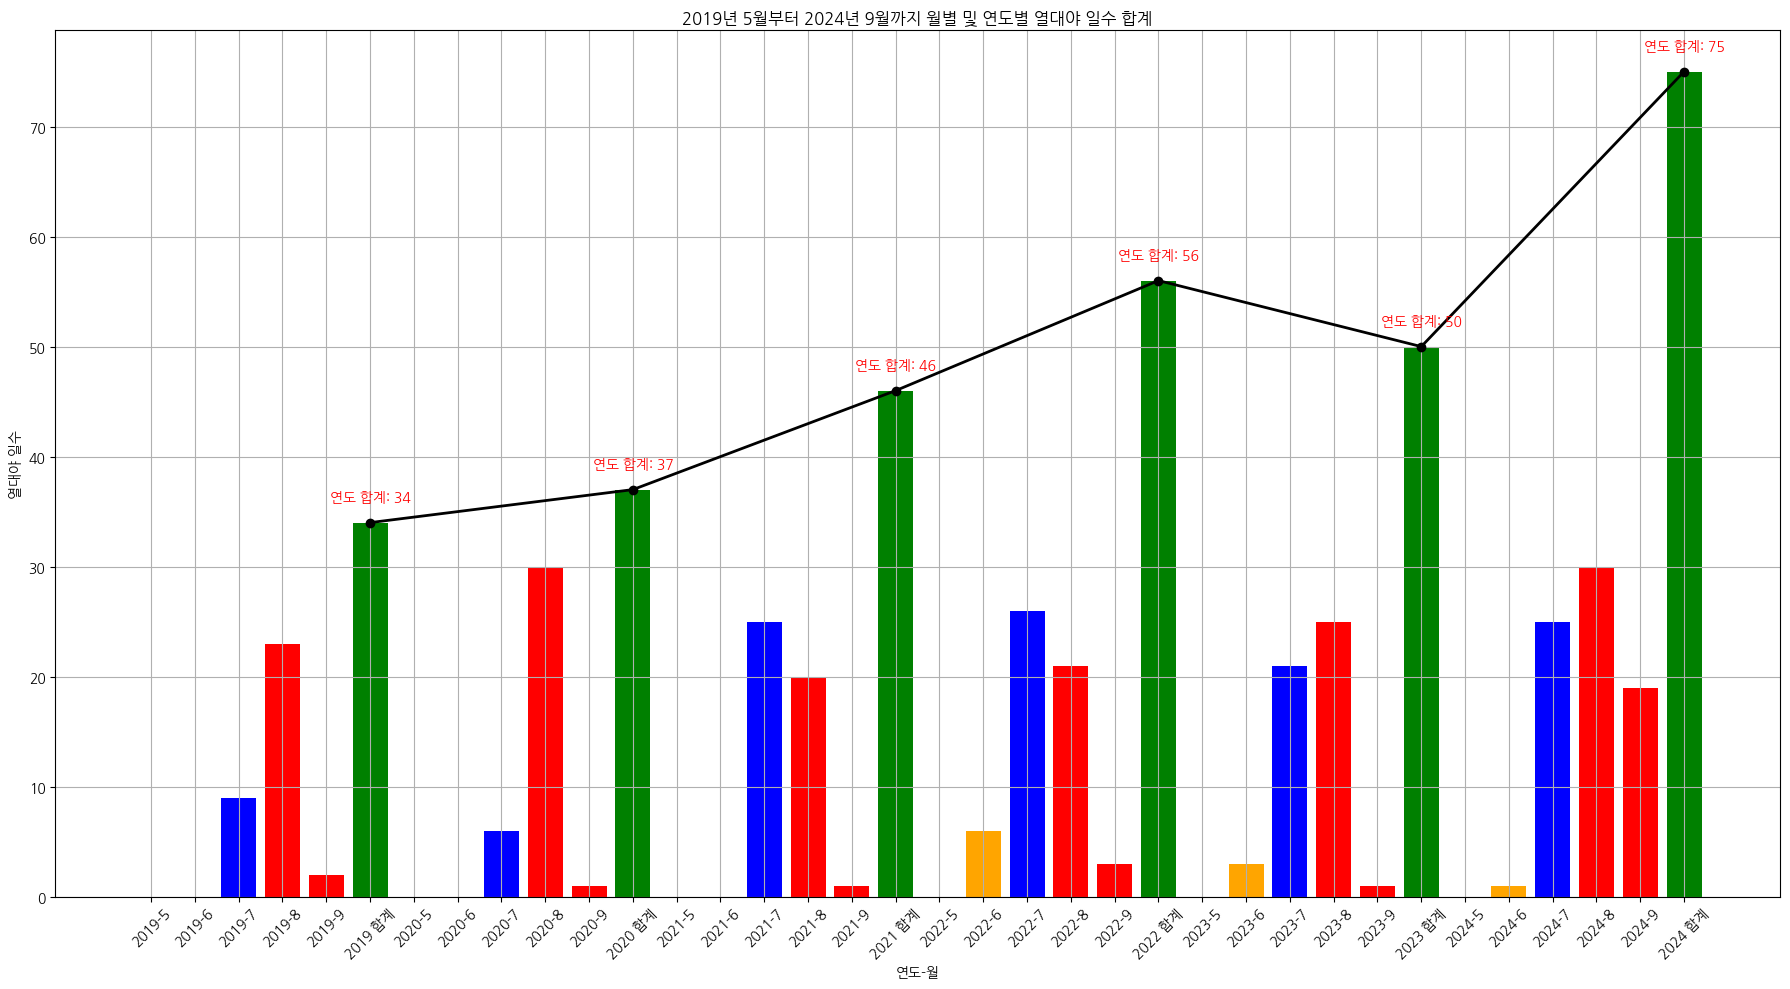

In [ ]:
# 그래프 그리기 설정
plt.figure(figsize=(18, 10))
colors = ['green', 'orange', 'blue', 'red']

# 각 연도의 5~9월과 연도별 총합계 열대야 일수를 막대 그래프로 그리기
for i, year in enumerate(final_data['연도'].unique()):
    data = final_data[final_data['연도'] == year]
    color_cycle = colors[:5] + ['red']  # 마지막 막대는 연도별 총합계를 위한 빨간색 지정
    bars = plt.bar(
        [f"{year}-{int(month)}" if month != '합계' else f"{year} 합계" for month in data['월']],
        data['열대야'],
        color=color_cycle
    )

    # 연도별 총합계 텍스트 표시
    total_sum = data[data['월'] == '합계']['열대야'].values
    if total_sum.size > 0:
        plt.text(len(data) - 1 + (i * 6), total_sum[0] + 2, f'연도 합계: {int(total_sum[0])}', color='red', ha='center')

# 연도별 총합계 데이터를 꺾은선 그래프로 추가
yearly_totals = yearly_sums['열대야'].values
plt.plot([f"{year} 합계" for year in yearly_sums['연도']], yearly_totals, marker='o', color='black', linestyle='-', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('2019년 5월부터 2024년 9월까지 월별 및 연도별 열대야 일수 합계')
plt.xlabel('연도-월')
plt.ylabel('열대야 일수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# 7. 제주지점의 월평균 기온을 구하고 그 변화 추이를 꺾은선 그래프로 표현

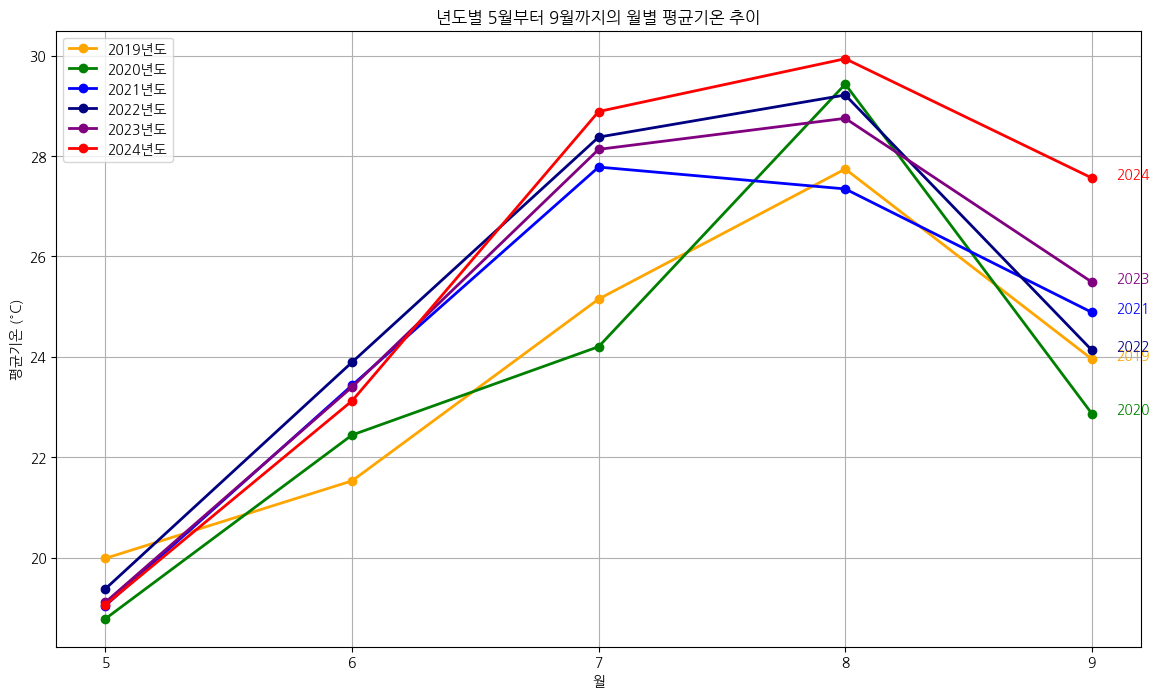

In [ ]:
# 첫 번째 시트에서 데이터 불러오기
df_data = pd.read_excel(file_path, sheet_name='Sheet1')

# '일자' 열에서 월을 추출
df_data['월'] = pd.to_datetime(df_data['일자']).dt.month

# 월별 평균기온 계산
monthly_avg_temp = df_data.groupby('월')['평균기온'].mean()

# '일자' 열에서 연도와 월을 추출
df_data['년도'] = pd.to_datetime(df_data['일자']).dt.year

# 분석에 사용할 연도 필터링
years = [2019, 2020, 2021, 2022, 2023, 2024]
colors = {
    2019: 'orange',
    2020: 'green',
    2021: 'blue',
    2022: 'navy',
    2023: 'purple',
    2024: 'red'
}

# 5월부터 9월까지의 데이터만 필터링
selected_months = [5, 6, 7, 8, 9]

# 9월 데이터 포인트 오른쪽에 연도 레이블을 표시하며 그래프 그리기
plt.figure(figsize=(14, 8))

# 각 연도에 대해 5월부터 9월까지의 월별 평균기온을 그리기
for year in years:
    yearly_data = df_data[(df_data['년도'] == year) & (df_data['월'].isin(selected_months))].groupby('월')['평균기온'].mean()
    if not yearly_data.empty:
        plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color=colors[year], linewidth=2, label=f'{year}년도')
        # 9월 데이터 포인트 오른쪽에 연도 레이블 추가
        if 9 in yearly_data.index:
            plt.text(9.1, yearly_data.loc[9], f'{year}', fontsize=10, color=colors[year], ha='left')

plt.title('년도별 5월부터 9월까지의 월별 평균기온 추이')
plt.xlabel('월')
plt.ylabel('평균기온 (°C)')
plt.xticks(selected_months)
plt.grid(True)
plt.legend()
plt.show()

# 8. "년도별 월평균기온"은 "일자"에서 "년도"와 "월"을 추출하여 새로운 셀을 만든 후 .groupby 매써드로 만든 엑셀파일을 저장하기

In [ ]:
# 엑셀 파일로 저장
output_file_path = './df_jeju_average_monthly_temperature.xlsx'
df_data.to_excel(output_file_path, index=False)

# 9. 제주지점의 월별 폭염 발생 일수를 구하고, 이를 누적막대그래프로 그리기

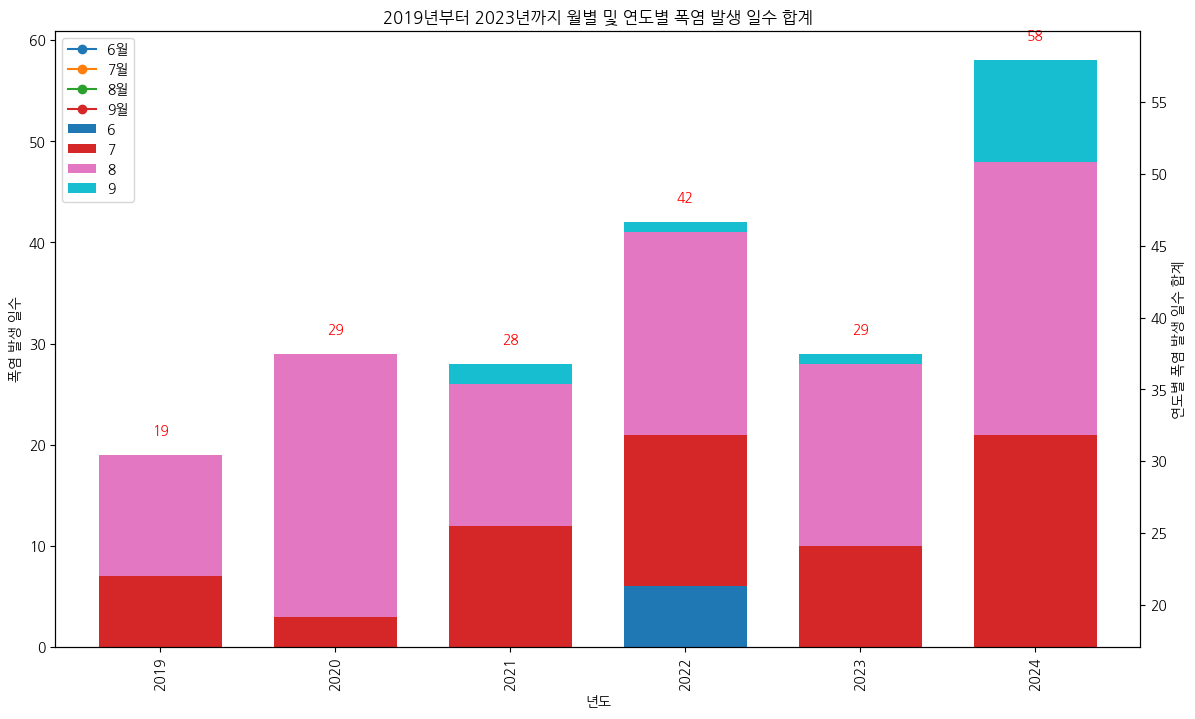

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 월별 및 연도별 데이터를 다시 생성
df['일자'] = pd.to_datetime(df['일자'])
df['년도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month

# 월별 폭염 발생 일수 계산
monthly_heat_days = df[df['폭염'] == 1].groupby(['년도', '월'])['폭염'].sum().unstack(fill_value=0)

# 연도별 폭염 발생 일수 합계 계산
yearly_heat_days = monthly_heat_days.sum(axis=1)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(14, 8))

# 월별 폭염 발생 일수 누적 막대 그래프
colors = plt.cm.tab10(np.linspace(0, 1, monthly_heat_days.shape[1]))
monthly_heat_days.plot(kind='bar', stacked=True, ax=ax1, color=colors, width=0.7, legend=True)
ax1.set_ylabel('폭염 발생 일수')
ax1.set_xlabel('년도')
ax1.set_title('2019년부터 2023년까지 월별 및 연도별 폭염 발생 일수 합계')

# 연도별 합계 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(yearly_heat_days.index, yearly_heat_days.values, marker='o', color='black', linewidth=2, label='연도별 합계')
ax2.set_ylabel('연도별 폭염 발생 일수 합계')

# 월별 데이터의 꺾은선 그래프 추가
for month in monthly_heat_days.columns:
    ax1.plot(monthly_heat_days.index, monthly_heat_days[month], marker='o', linewidth=1.5, label=f'{month}월')

# 연도별 합계 값 표시
for i, value in enumerate(yearly_heat_days):
    ax1.text(i, value + 2, f'{value}', ha='center', color='red', fontsize=10)

# 범례 위치 조정
ax1.legend(loc='upper left')

plt.show()


# 10. # df_jeju_heat 데이터프레임을 생성하여 monthly_heat_days와 yearly_heat_days를 포함하도록 구성한 후 엑셀 파일로 저장

In [ ]:
# monthly_heat_days와 yearly_heat_days를 df_jeju_heat에 합쳐서 새로운 데이터프레임 생성
df_jeju_heat = monthly_heat_days.copy()
df_jeju_heat['연도별 합계'] = yearly_heat_days

df_jeju_heat.head()


월,6,7,8,9,연도별 합계
년도,,,,,
2019,0,7,12,0,19
2020,0,3,26,0,29
2021,0,12,14,2,28
2022,6,15,20,1,42
2023,0,10,18,1,29


In [ ]:
# 엑셀 파일로 저장
output_file_path = './df_jeju_heat_wave.xlsx'
df_jeju_heat.to_excel(output_file_path, index=False)